Important: 
1. Always load the data file in .CSV, otherwise it won't work :)
2. Check the accurate file pathway
3. Update the right 'Period' & 'Difference' for each market

# 1. (Ugly stuff) Loading libraries


In [79]:
# dataframe opertations - pandas
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#Review the accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error

# 2. Loading data (Check pathways)

In [80]:
forecast_data = pd.read_csv('/content/Data.csv',index_col='PO Date', parse_dates=True)

In [81]:
forecast_data = forecast_data.rename(columns={'Sales Amt': 'SalesAmt'})

(33289, 7)
            Year  Month Channel     Cust ID   Item    Qty  Sales Amt
PO Date                                                             
2019-01-01  2019      1      AH  1300950362  CXB02  -30.0    -8544.0
2019-01-01  2019      1      AH  1300951458  EZA01   50.0    42714.0
2019-01-01  2019      1      AH  1300938625  LSN01  110.0    12407.0
2019-01-01  2019      1      AH  1300942430  LSN01  160.0    13824.0
2019-01-01  2019      1      AH  1300942783  LSN01  199.0    10613.0


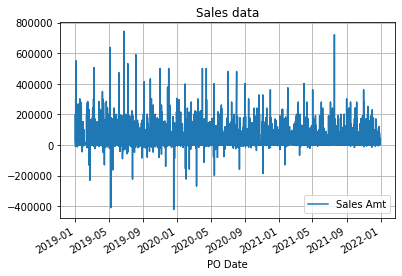

In [82]:
Raw_data = pd.read_csv('/content/Data.csv',index_col='PO Date', parse_dates=True)


# finding shape of the dataframe
print(Raw_data.shape)
# having a look at the data
print(Raw_data.head())
# plotting the original data
Raw_data[['Sales Amt']].plot(title='Sales data')
plt.grid(True)


In [83]:
Raw_data = Raw_data.rename(columns={'Sales Amt': 'SalesAmt'})

In [84]:
#Checking if there is any missing values

Raw_data.isnull().sum()

Year           0
Month          0
Channel        0
Cust ID        0
Item           0
Qty         1285
SalesAmt      37
dtype: int64

# 3: Updating period

In [85]:
# Set the value of Alpha and define m (Time Period)
m = 2
alpha = 1/(2*m)

# 4. (Ugly stuff) Decomposing the Time Series

In [86]:
# Reconstruct the dataset (Date as the assigned independent variable)

Raw_data = Raw_data.resample(rule='W').sum()

In [111]:
Raw_data = Raw_data.groupby('PO Date').sum()

decompose_result = seasonal_decompose(Raw_data,model='multiplicative', freq = m)
decompose_result.plot();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

# 5. (Ugly stuff) Train test Split

In [88]:
count = len(Raw_data) - 6
train = Raw_data[:count] #til the most recent week
test = Raw_data[count:] # from the most recent week
train.tail()

,Year,Month,Cust ID,Qty,SalesAmt
PO Date,,,,,
2021-10-24,410263,2030,264093269482,12763.0,2495099.0
2021-10-31,359738,1780,231569688246,10056.0,1971985.0
2021-11-07,699266,3806,450127216186,29427.0,6064696.0
2021-11-14,420368,2288,270597746334,13033.0,2134436.0
2021-11-21,367822,2002,236772454123,10623.0,2396404.0


In [89]:
test

,Year,Month,Cust ID,Qty,SalesAmt
PO Date,,,,,
2021-11-28,377927,2057,243276889225,11563.0,2693686.0
2021-12-05,592153,3442,381178055800,20243.0,3601293.0
2021-12-12,365801,2172,235471147276,14509.0,2265122.0
2021-12-19,335486,1992,215958434092,8538.0,2092743.0
2021-12-26,242520,1440,156113469996,11478.0,1353537.0
2022-01-02,155617,924,100172819508,7457.0,1059491.0


# 6. (Kinda Ugly Stuff) Holt-Winter's Model

In [90]:
# Set the frequency of the date time index as Weekly start as indicated by the data
Raw_data.index.freq = 'W'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


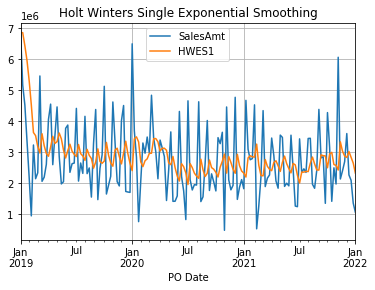

In [92]:
# Single HWES (H-w Exponential Smoothing)
Raw_data['HWES1'] = SimpleExpSmoothing(Raw_data['SalesAmt']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
Raw_data[['SalesAmt','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');
plt.grid(True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


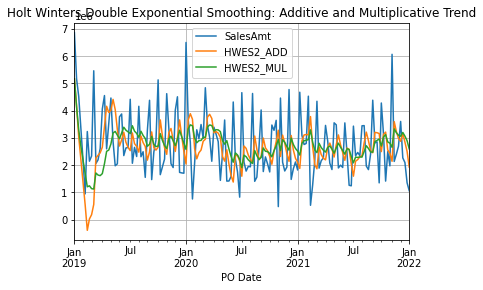

In [95]:
# Double HWES (H-w Exponential Smoothing)
Raw_data['HWES2_ADD'] = ExponentialSmoothing(Raw_data['SalesAmt'],trend='add').fit().fittedvalues
Raw_data['HWES2_MUL'] = ExponentialSmoothing(Raw_data['SalesAmt'],trend='mul').fit().fittedvalues
Raw_data[['SalesAmt','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');
plt.grid(True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


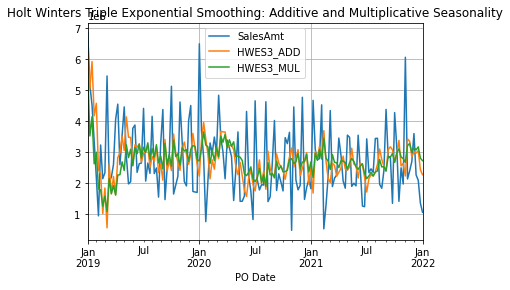

In [94]:
# Tripple HWES (H-w Exponential Smoothing)
Raw_data['HWES3_ADD'] = ExponentialSmoothing(Raw_data['SalesAmt'],trend='add',seasonal='add',seasonal_periods=m).fit().fittedvalues
Raw_data['HWES3_MUL'] = ExponentialSmoothing(Raw_data['SalesAmt'],trend='mul',seasonal='mul',seasonal_periods=m).fit().fittedvalues
Raw_data[['SalesAmt','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');
plt.grid(True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


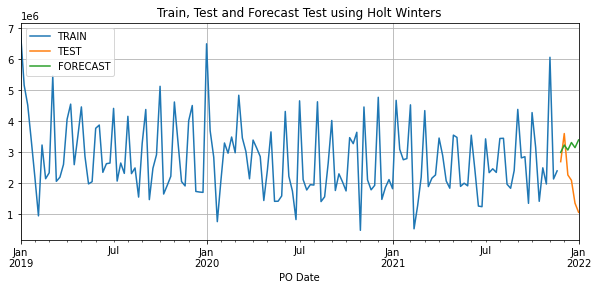

In [96]:
fitted_model = ExponentialSmoothing(train['SalesAmt'],trend='mul',seasonal='mul',seasonal_periods=m).fit()
test_predictions = fitted_model.forecast(6)
train['SalesAmt'].plot(legend=True,label='TRAIN')
test['SalesAmt'].plot(legend=True,label='TEST',figsize=(10,4))
test_predictions.plot(legend=True,label='FORECAST')
plt.title('Train, Test and Forecast Test using Holt Winters');
plt.grid(True)

In [110]:
test_predictions

2021-11-28    2.993433e+06
2021-12-05    3.230281e+06
2021-12-12    3.069004e+06
2021-12-19    3.311831e+06
2021-12-26    3.146482e+06
2022-01-02    3.395440e+06
Freq: W-SUN, dtype: float64

# 7. (Ugly stuff) Review and Evaluation Metrics

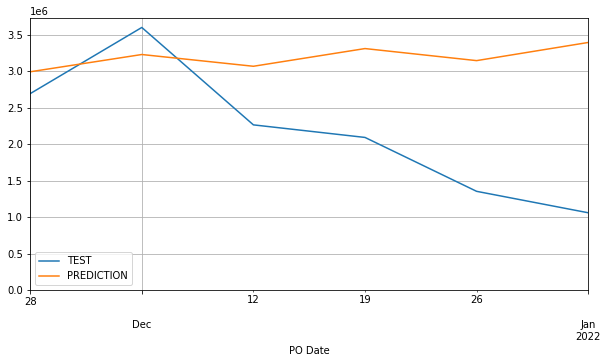

In [109]:
test['SalesAmt'].plot(legend=True,label='TEST',figsize=(10,5))
test_predictions.plot(legend=True,label='PREDICTION');
plt.ylim(bottom=0)
plt.grid(True)


In [108]:
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')

ValueError: ignored

In [107]:
np.sqrt(mean_squared_error(test,test_predictions))

ValueError: ignored

In [101]:
Raw_data.SalesAmt.mean(),np.sqrt(Raw_data.SalesAmt.var())

(2762658.1401273888, 1189258.419610248)

In [102]:
test_array = test.to_numpy()
test_predictions_array = test_predictions.to_numpy()
test_array_row = test_array.transpose()
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(test_array_row[0,:], test_predictions_array)

1007.1782265944419

# 8. Final Forecast Model

In [104]:
# Here shows the forecast data of the upcoming 6 weeks

final_model = ExponentialSmoothing(Raw_data.SalesAmt, trend='add',seasonal='mul',seasonal_periods=m).fit()
pred = final_model.forecast(96)
pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2022-01-09    1.096263e+06
2022-01-16    8.042859e+05
2022-01-23    4.165841e+05
2022-01-30    8.160056e+04
2022-02-06   -2.630949e+05
                  ...     
2023-10-08   -3.171655e+07
2023-10-15   -3.016897e+07
2023-10-22   -3.243924e+07
2023-10-29   -3.084865e+07
2023-11-05   -3.316193e+07
Freq: W-SUN, Length: 96, dtype: float64

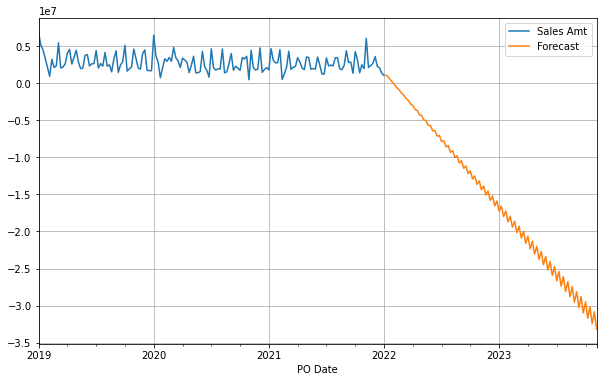

In [105]:
# And the plot of forecast data along with the whole dataset

Raw_data['SalesAmt'].plot(legend=True,label='Sales Amt',figsize=(10,6))
pred.plot(legend=True, label = 'Forecast')
plt.grid(True)

In [106]:
# mean absolute percentage error
print(f'Percentage of Mean absolute percentage error is MAPE = {mape(test_array_row[0,:], test_predictions_array)}%')

Percentage of Mean absolute percentage error is MAPE = 1007.1782265944419%
